# Homework 5: Predict Time Series
Applied Neural Networks

**Part 1**</br>
Generate a time series dataset (10000 series with 100 points each). Build these from two sine waves and noise, similar to what we did in class, HOWEVER instead of adding the two sine waves together you will MULTIPLY them, each weighted the same (and then add noise). This will create an oscillating signal of the shorter wavelength sine with an overlaid oscillating "envelope" from the larger wavelength sine. <br/>
Graph several example series.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

np.random.seed(15)
tf.random.set_seed(15)

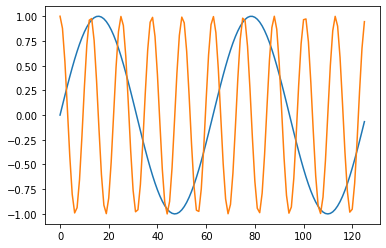

In [2]:
# generating dataset to see what the waves will look like
import matplotlib.pyplot as plt

time = np.arange(0, 4*np.pi, 0.1)
sine = np.sin(time)
sine2 = np.sin(5*time + 0.5*np.pi)

plt.plot(sine)
plt.plot(sine2)

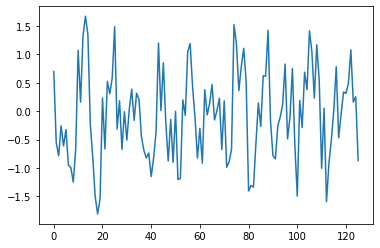

In [3]:
# generate noise
noise = np.random.random(len(time))
noise = 2*noise - 1

# generate the signal. Multiply sine waves, add noise
# this is added in the make_waves function
signal = sine * sine2 + noise
plt.plot(signal)

In [6]:
# defining a function that will Generate a time series dataset with 10,000 waves
# with 100 points each
# sine waves multiply and noise is added
# does not want to do 100 points for some reason, it only wants 126 points...
# it should be as simple as changing the 126 to 100
def make_waves(n):
  data = np.empty((n, 126))
  for i in range(n):
    # Dominant wave
    freq = np.random.uniform(0.2, 5)
    offset = np.random.uniform(-1, 1)
    sine = np.sin(freq*time + offset*np.pi)
    # Secondary wave
    freq = np.random.uniform(0.2, 5)
    offset = np.random.uniform(-1, 1)
    sine2 = np.sin(freq*time + offset*np.pi)
    # Noise
    noise = np.random.random(len(time))
    noise = 2*noise - 1
    # Total signal
    signal = (sine * sine2) + noise
    data[i,:] = signal
  return data

In [5]:
# error: could not broadcast input array from shape (126,) into shape (100,)
# even thought the array is np.empty((n, 100)), strange
# function changed back to 126
dataset = make_waves(10000)
dataset.shape

ValueError: ignored

In [7]:
dataset = make_waves(10000)
dataset.shape

(10000, 126)

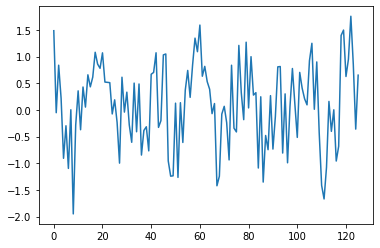

In [8]:
plt.plot(dataset[42])

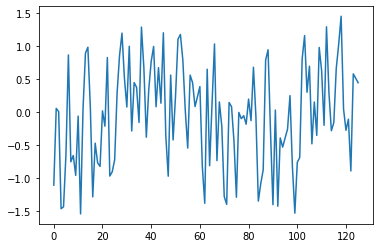

In [9]:
plt.plot(dataset[100])

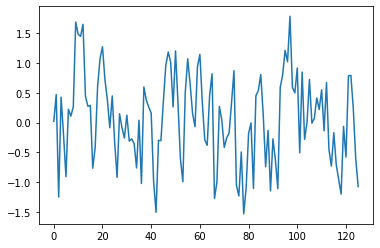

In [10]:
plt.plot(dataset[5034])

**Part 2** </br>
Predict the 81st point.<br/>
Use the first 80 points for training. Create training, validation, and testing sets. Utilize an RNN.</br>
Give your testing and validation accuracies, and graph a couple series (including prediction and actual 81st points).


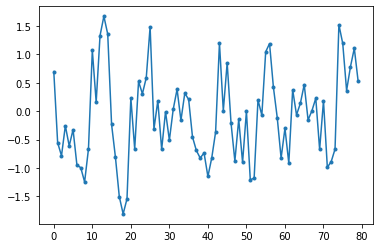

In [11]:
# using first 80 points for training
plt.plot(signal[:80], marker='o', markersize=3)

In [12]:
# first 7000 for training
# next 2000 for validation
# last 1000 for testing
# trying to predict the 81st point

X_train = dataset[:7000, :80]
y_train = dataset[:7000, 80]

X_valid = dataset[7000:9000, :80]
y_valid = dataset[7000:9000, 80]

X_test = dataset[9000:, :80]
y_test = dataset[9000:, 80]

In [13]:
# adjust the dimensions for keras
X_train = np.expand_dims(X_train, axis=-1)
X_valid = np.expand_dims(X_valid, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train.shape

(7000, 80, 1)

In [14]:
# create basic rnn model
model = keras.models.Sequential([keras.layers.SimpleRNN(1, input_shape=[None,1])])
optimizer = keras.optimizers.Nadam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


In [17]:
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data = (X_valid, y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
219/219 [==============================] - 2s 9ms/step - loss: 0.4847 - val_loss: 0.4941
Epoch 2/100
219/219 [==============================] - 2s 9ms/step - loss: 0.4850 - val_loss: 0.4946
Epoch 3/100
219/219 [==============================] - 2s 8ms/step - loss: 0.4850 - val_loss: 0.4941
Epoch 4/100
219/219 [==============================] - 2s 8ms/step - loss: 0.4849 - val_loss: 0.4941
Epoch 5/100
219/219 [==============================] - 2s 9ms/step - loss: 0.4851 - val_loss: 0.4939
Epoch 6/100
219/219 [==============================] - 2s 9ms/step - loss: 0.4849 - val_loss: 0.4941
Epoch 7/100
219/219 [==============================] - 2s 8ms/step - loss: 0.4850 - val_loss: 0.4939
Epoch 8/100
219/219 [==============================] - 2s 8ms/step - loss: 0.4848 - val_loss: 0.4940
Epoch 9/100
219/219 [==============================] - 2s 8ms/step - loss: 0.4854 - val_loss: 0.4939
Epoch 10/100
219/219 [==============================] - 2s 8ms/step - loss: 0.4850 - val_lo

In [18]:
# mse of about 0.59
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.4858


0.48583054542541504

In [19]:
def plot_pred(y_pred, y_true, signal):
  plt.plot(signal, marker='o', markersize=3)
  plt.plot(len(signal)+1, y_pred, marker='s')
  plt.plot(len(signal)+1, y_true, marker='o', markersize=5, c='red')
  plt.show()

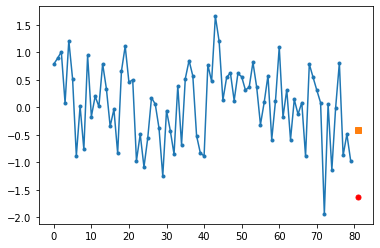

In [20]:
# prediction is pretty far from the actual value, but the model isn't very good
# so that is to be expected
y_pred = model.predict(X_train)
plot_pred(y_pred[45], y_train[45], X_train[45])

In [24]:
# deeper model
model = keras.models.Sequential([
              keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(1)])
optimizer = keras.optimizers.Nadam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)

In [25]:
history_2 = model.fit(X_train, y_train, epochs=100, 
                    validation_data = (X_valid, y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
219/219 [==============================] - 11s 41ms/step - loss: 0.5760 - val_loss: 0.5088
Epoch 2/100
219/219 [==============================] - 9s 40ms/step - loss: 0.5083 - val_loss: 0.5113
Epoch 3/100
219/219 [==============================] - 8s 39ms/step - loss: 0.5102 - val_loss: 0.5024
Epoch 4/100
219/219 [==============================] - 8s 38ms/step - loss: 0.4982 - val_loss: 0.5179
Epoch 5/100
219/219 [==============================] - 8s 38ms/step - loss: 0.4921 - val_loss: 0.5180
Epoch 6/100
219/219 [==============================] - 8s 38ms/step - loss: 0.4921 - val_loss: 0.4990
Epoch 7/100
219/219 [==============================] - 8s 38ms/step - loss: 0.4902 - val_loss: 0.4999
Epoch 8/100
219/219 [==============================] - 8s 38ms/step - loss: 0.4894 - val_loss: 0.4997
Epoch 9/100
219/219 [==============================] - 8s 38ms/step - loss: 0.4890 - val_loss: 0.4972
Epoch 10/100
219/219 [==============================] - 8s 39ms/step - loss: 0.48

In [26]:
# about 0.48 mse
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 10ms/step - loss: 0.4760


0.4760269522666931

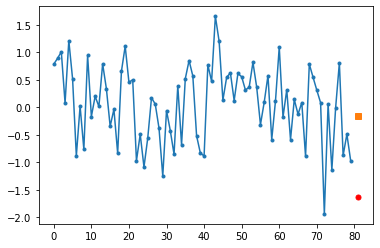

In [27]:
# model isn't very accurate still
y_pred = model.predict(X_train)
plot_pred(y_pred[45], y_train[45], X_train[45])

In [28]:
# model with a final dense layer
model = keras.models.Sequential([
              keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(20),
              keras.layers.Dense(1)])
optimizer = keras.optimizers.Nadam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)

In [29]:
history_3 = model.fit(X_train, y_train, epochs=100, 
                    validation_data = (X_valid, y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
219/219 [==============================] - 9s 31ms/step - loss: 0.5202 - val_loss: 0.5309
Epoch 2/100
219/219 [==============================] - 6s 30ms/step - loss: 0.4989 - val_loss: 0.4985
Epoch 3/100
219/219 [==============================] - 7s 30ms/step - loss: 0.4945 - val_loss: 0.4978
Epoch 4/100
219/219 [==============================] - 7s 30ms/step - loss: 0.4923 - val_loss: 0.5059
Epoch 5/100
219/219 [==============================] - 7s 30ms/step - loss: 0.4939 - val_loss: 0.4971
Epoch 6/100
219/219 [==============================] - 6s 30ms/step - loss: 0.4921 - val_loss: 0.5059
Epoch 7/100
219/219 [==============================] - 7s 31ms/step - loss: 0.4911 - val_loss: 0.4994
Epoch 8/100
219/219 [==============================] - 7s 31ms/step - loss: 0.4900 - val_loss: 0.5009
Epoch 9/100
219/219 [==============================] - 7s 32ms/step - loss: 0.4910 - val_loss: 0.4990
Epoch 10/100
219/219 [==============================] - 7s 30ms/step - loss: 0.490

In [30]:
# about 0.49 mse
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 8ms/step - loss: 0.4908


0.490848571062088

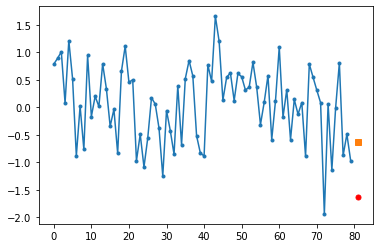

In [31]:
# I mean, it's kind of closer but models aren't really getting any better...
y_pred = model.predict(X_train)
plot_pred(y_pred[45], y_train[45], X_train[45])

In [36]:
# So the prediction is off by a pretty big magnitude, a difference of about 1 here
print(model.predict(X_train)[45])
print(y_train[45])

[-0.63445634]
-1.6342581047928437


**Part 3** </br>
Predict the 81-90th points.</br>
Use the first 80 points for training. Create training, validation, and testing sets. Create at least **one sequence-to-vector** RNN and **one sequence-to-sequence** RNN and compare their results.<br/>
Give your testing and validation accuracies, and graph a couple series (including prediction and actual 81-90th points) for both RNNs.

In [37]:
# adjust datasets
num_predictions = 10
Y_train = dataset[:7000, 80:80 + num_predictions]
Y_valid = dataset[7000:9000, 80:80 + num_predictions]
Y_test = dataset[9000:, 80:80 + num_predictions]
Y_train.shape

(7000, 10)

In [38]:
# Sequence-to-vector model
model = keras.models.Sequential([
              keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(20),
              keras.layers.Dense(num_predictions)])
optimizer = keras.optimizers.Nadam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)

In [39]:
# capital Y's for new datasets
history_4 = model.fit(X_train, Y_train, epochs=100,
                    validation_data = (X_valid, Y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
219/219 [==============================] - 9s 31ms/step - loss: 0.5958 - val_loss: 0.5827
Epoch 2/100
219/219 [==============================] - 7s 30ms/step - loss: 0.5757 - val_loss: 0.5796
Epoch 3/100
219/219 [==============================] - 7s 30ms/step - loss: 0.5731 - val_loss: 0.5818
Epoch 4/100
219/219 [==============================] - 7s 30ms/step - loss: 0.5694 - val_loss: 0.5756
Epoch 5/100
219/219 [==============================] - 7s 30ms/step - loss: 0.5679 - val_loss: 0.5752
Epoch 6/100
219/219 [==============================] - 7s 32ms/step - loss: 0.5666 - val_loss: 0.5731
Epoch 7/100
219/219 [==============================] - 7s 32ms/step - loss: 0.5666 - val_loss: 0.5772
Epoch 8/100
219/219 [==============================] - 7s 30ms/step - loss: 0.5664 - val_loss: 0.5699
Epoch 9/100
219/219 [==============================] - 7s 30ms/step - loss: 0.5662 - val_loss: 0.5720
Epoch 10/100
219/219 [==============================] - 7s 30ms/step - loss: 0.565

In [40]:
# about 0.56 mse, worse than the previous models
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 8ms/step - loss: 0.5644


0.5644405484199524

In [41]:
def plot_vector_pred(Y_pred, Y_true, signal):
  plt.plot(signal, marker='o', markersize=3)
  start = len(signal) + 1
  plt.plot(np.arange(start, start+num_predictions), Y_pred, marker='s')
  plt.plot(np.arange(start, start+num_predictions), Y_true, marker='o', markersize=5, c='red')
  plt.show()

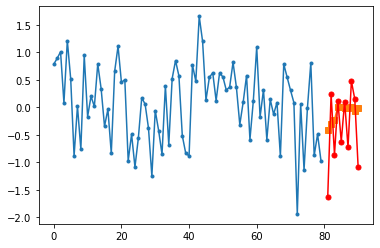

In [42]:
# predictions seems to all be around the same area while the actual values
# are scattered around
Y_pred = model.predict(X_train)
plot_vector_pred(Y_pred[45], Y_train[45], X_train[45])

In [44]:
num_predictions = 10
num_steps = 80
Y = np.empty( (10000, num_steps, num_predictions) )
for i in range(num_steps):
  Y[:, i, :] = dataset[:, i+1:i+num_predictions+1]

In [45]:
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]
Y.shape

(10000, 80, 10)

In [47]:
# model for sequence-to-sequence rnn
model = keras.models.Sequential([
              keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]), 
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.TimeDistributed(keras.layers.Dense(num_predictions))])

def last_mse(Y_true, Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Nadam(learning_rate=0.01)  
model.compile(loss="mse", optimizer=optimizer, metrics=[last_mse])

In [48]:
history_5 = model.fit(X_train, Y_train, epochs=100,
                    validation_data = (X_valid, Y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
219/219 [==============================] - 9s 32ms/step - loss: 0.5734 - last_mse: 0.5754 - val_loss: 0.5689 - val_last_mse: 0.5694
Epoch 2/100
219/219 [==============================] - 7s 31ms/step - loss: 0.5636 - last_mse: 0.5645 - val_loss: 0.5678 - val_last_mse: 0.5686
Epoch 3/100
219/219 [==============================] - 7s 32ms/step - loss: 0.5632 - last_mse: 0.5646 - val_loss: 0.5669 - val_last_mse: 0.5678
Epoch 4/100
219/219 [==============================] - 7s 31ms/step - loss: 0.5623 - last_mse: 0.5625 - val_loss: 0.5687 - val_last_mse: 0.5679
Epoch 5/100
219/219 [==============================] - 7s 31ms/step - loss: 0.5633 - last_mse: 0.5642 - val_loss: 0.5683 - val_last_mse: 0.5686
Epoch 6/100
219/219 [==============================] - 7s 31ms/step - loss: 0.5623 - last_mse: 0.5632 - val_loss: 0.5684 - val_last_mse: 0.5691
Epoch 7/100
219/219 [==============================] - 7s 32ms/step - loss: 0.5631 - last_mse: 0.5646 - val_loss: 0.5676 - val_last_mse:

In [49]:
# about 0.56 mse, like model before. Models don't seem to be improving
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 8ms/step - loss: 0.5652 - last_mse: 0.5641


[0.5651821494102478, 0.5640579462051392]

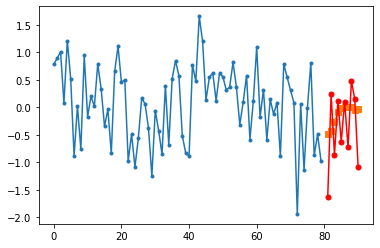

In [51]:
Y_pred = model.predict(X_train)
plot_vector_pred(Y_pred[45, -1], Y_train[45, -1], X_train[45])

In [52]:
# last layer is now rnn
model = keras.models.Sequential([
              keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]), 
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(20, return_sequences=True),
              keras.layers.SimpleRNN(num_predictions, return_sequences=True)])

def last_mse(Y_true, Y_pred):
  return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Nadam(learning_rate=0.01)  
model.compile(loss="mse", optimizer=optimizer, metrics=[last_mse])

In [53]:
history_6 = model.fit(X_train, Y_train, epochs=100,
                    validation_data = (X_valid, Y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
219/219 [==============================] - 12s 42ms/step - loss: 0.5728 - last_mse: 0.5749 - val_loss: 0.5682 - val_last_mse: 0.5680
Epoch 2/100
219/219 [==============================] - 9s 40ms/step - loss: 0.5626 - last_mse: 0.5633 - val_loss: 0.5666 - val_last_mse: 0.5654
Epoch 3/100
219/219 [==============================] - 9s 40ms/step - loss: 0.5610 - last_mse: 0.5611 - val_loss: 0.5650 - val_last_mse: 0.5624
Epoch 4/100
219/219 [==============================] - 9s 39ms/step - loss: 0.5604 - last_mse: 0.5598 - val_loss: 0.5673 - val_last_mse: 0.5663
Epoch 5/100
219/219 [==============================] - 9s 39ms/step - loss: 0.5578 - last_mse: 0.5564 - val_loss: 0.5623 - val_last_mse: 0.5585
Epoch 6/100
219/219 [==============================] - 9s 41ms/step - loss: 0.5607 - last_mse: 0.5603 - val_loss: 0.5648 - val_last_mse: 0.5636
Epoch 7/100
219/219 [==============================] - 9s 39ms/step - loss: 0.5631 - last_mse: 0.5641 - val_loss: 0.5687 - val_last_mse

In [54]:
# about 0.56 mse, every model seems to be performing the same
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 10ms/step - loss: 0.5623 - last_mse: 0.5616


[0.5622571706771851, 0.561579704284668]

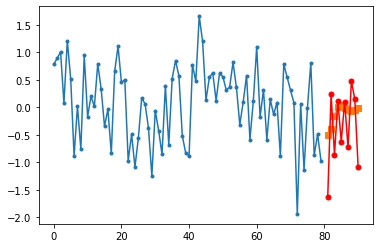

In [55]:
Y_pred = model.predict(X_train)
plot_vector_pred(Y_pred[45, -1], Y_train[45, -1], X_train[45])

**Part 4**</br>
Discuss your findings.

Most of the models didn't perform very well and didn't seem to increase accuracy through training or through different architectures. I'm not sure why this occured, and any changes I attempted to make didn't seem to have any effect. There was also an issue generating the data set with only 100 points, where it required 126 points to be used. Restarting the session and adjusting the code didn't affect the error either. Overall, the models did not perform well and their performance didn't seem to be affected by any significant magnitude with changes in architecture.